In [176]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color
from skimage import io

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

In [177]:
color_image = io.imread('datasets/pishi.jpg')

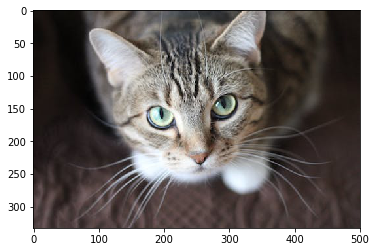

In [178]:
plt.imshow(color_image, cmap=plt.cm.gray)
plt.show();

In [179]:
img = color.rgb2gray(color_image)

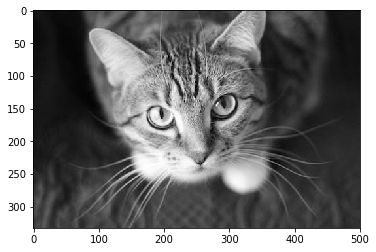

In [180]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show();

In [181]:
img.shape

(333, 500)

In [182]:
height, width = img.shape

In [183]:
distored_img = img.copy()

In [184]:
distored_img

array([[0.08567137, 0.08567137, 0.08567137, ..., 0.08567137, 0.08567137,
        0.08567137],
       [0.0817498 , 0.0817498 , 0.0817498 , ..., 0.08567137, 0.08567137,
        0.08567137],
       [0.0817498 , 0.0817498 , 0.0817498 , ..., 0.08567137, 0.08567137,
        0.0817498 ],
       ...,
       [0.22568627, 0.24137255, 0.25872549, ..., 0.19628588, 0.19628588,
        0.19628588],
       [0.22820902, 0.24389529, 0.25844275, ..., 0.19628588, 0.19628588,
        0.19628588],
       [0.22764353, 0.2433298 , 0.25787725, ..., 0.19628588, 0.19628588,
        0.19628588]])

In [185]:
# add random noise to half of this image (random number in the form of 2-D matrix)
distoration = 0.075 * np.random.randn(height, width//2)
distoration.shape

(333, 250)

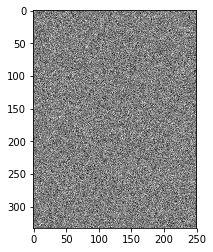

In [186]:
plt.imshow(distoration, cmap=plt.cm.gray)
plt.show()

In [187]:
distored_imag[:, width // 2:] +=distoration

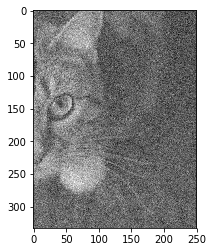

In [188]:
plt.imshow(distored_imag[:, width // 2:], cmap=plt.cm.gray)
plt.show()

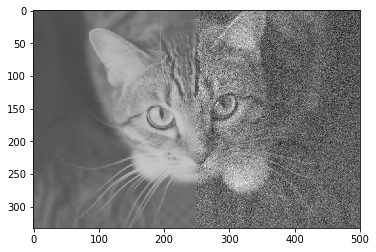

In [189]:
# right side is distorted, but not left side
plt.imshow(distored_imag, cmap=plt.cm.gray)
plt.show()

In [190]:
patch_size = (7,7)
# from the left side, whcih is not distorted
data = extract_patches_2d(distored_imag[:, :width // 2:], patch_size)

In [191]:
data.shape

(79788, 7, 7)

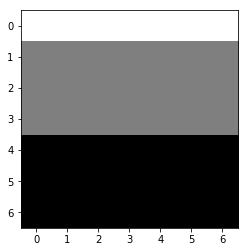

In [192]:
plt.imshow(data[0], cmap=plt.cm.gray)
plt.show();

In [193]:
# reshape it to have single vector for each batch
data = data.reshape(data.shape[0], -1)
data.shape

(79788, 49)

In [194]:
d_learning = MiniBatchDictionaryLearning(n_components=100, 
                                         alpha=1 , 
                                         n_iter=1000)

components = d_learning.fit(data).components_
components

/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.171e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.829e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.171e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 4.942e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


array([[ 0.13224516,  0.13380797,  0.13677164, ...,  0.14487426,
         0.14803398,  0.15030308],
       [ 0.17235764,  0.17810891,  0.17514806, ...,  0.11088259,
         0.10743101,  0.10753401],
       [ 0.10289079,  0.11825902,  0.13363009, ...,  0.14413112,
         0.1630008 ,  0.17701635],
       ...,
       [ 0.14699363,  0.02512951,  0.21408932, ...,  0.02270715,
         0.01243955,  0.04321445],
       [-0.12538806, -0.14161435,  0.03817828, ...,  0.26701825,
         0.03795261, -0.22186385],
       [-0.03293509, -0.03708404, -0.06854527, ..., -0.01977013,
         0.01704093,  0.19282575]])

In [195]:
components.shape

(100, 49)

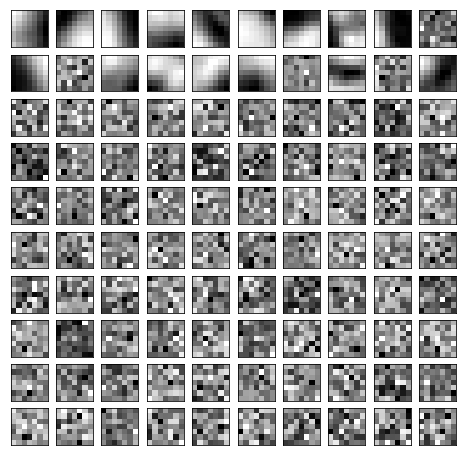

In [196]:
plt.figure(figsize=(8,8))

for i, comp in enumerate(components):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape(patch_size),
              cmap=plt.cm.gray_r,
              interpolation='nearest')
    
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [197]:
right_data = extract_patches_2d(distored_imag[:, width // 2:], patch_size)

In [198]:
right_data = right_data.reshape(right_data.shape[0],-1)
right_data.shape

(79788, 49)

In [199]:
# least-angle regression (LARS) is an algorithm for fitting linear regression models to high-dimensional data
d_learning.set_params(transform_n_nonzero_coefs=1, transform_algorithm='lars')

MiniBatchDictionaryLearning(alpha=1, batch_size=3, dict_init=None,
              fit_algorithm='lars', n_components=100, n_iter=1000,
              n_jobs=None, positive_code=False, positive_dict=False,
              random_state=None, shuffle=True, split_sign=False,
              transform_algorithm='lars', transform_alpha=None,
              transform_n_nonzero_coefs=1, verbose=False)

In [200]:
code = d_learning.transform(right_data)

In [201]:
print(code.shape)
print(components.shape)

(79788, 100)
(100, 49)


In [202]:
patches = np.dot(code, components)
patches.shape

(79788, 49)

In [203]:
#original representation 7 x 7
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(79788, 7, 7)

In [204]:
reconstructed_img = img.copy()

In [205]:
reconstructed_img[: , width // 2 :] = reconstruct_from_patches_2d(patches, (height,width//2))

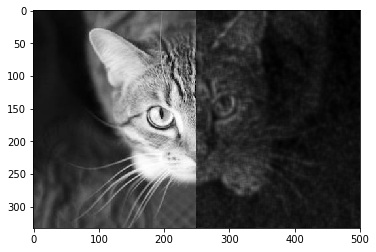

In [206]:
plt.imshow(reconstructed_img,
           vmin=0,
           vmax=1,
           cmap=plt.cm.gray,
           interpolation='nearest'
          )
plt.show()

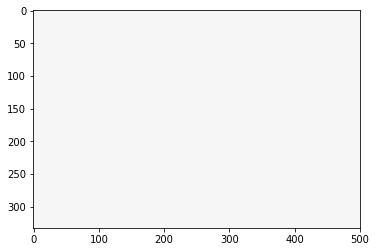

In [207]:
difference = img - distored_img
plt.imshow(difference,
           vmin=-0.5,
           vmax=0.5,
           cmap=plt.cm.PuOr,
           interpolation='nearest'
          )
plt.show()

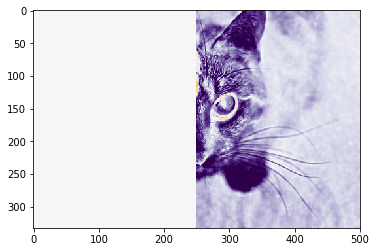

In [208]:
difference = img - reconstructed_img
plt.imshow(difference,
           vmin=-0.5,
           vmax=0.5,
           cmap=plt.cm.PuOr,
           interpolation='nearest'
          )
plt.show()

In [209]:
#Orthogonal Matching Pursuit Algorithm (OMP) is a greedy compressed sensing recovery algorithm 
#which selects the best fitting column of the sensing matrix in each iteration.
d_learning.set_params(transform_n_nonzero_coefs =1,transform_algorithm= 'omp')

MiniBatchDictionaryLearning(alpha=1, batch_size=3, dict_init=None,
              fit_algorithm='lars', n_components=100, n_iter=1000,
              n_jobs=None, positive_code=False, positive_dict=False,
              random_state=None, shuffle=True, split_sign=False,
              transform_algorithm='omp', transform_alpha=None,
              transform_n_nonzero_coefs=1, verbose=False)

In [210]:
code = d_learning.transform(right_data)

In [211]:
print('code shape: {}'.format(code.shape))
print('components shape: {}'.format(components.shape))

code shape: (79788, 100)
components shape: (100, 49)


In [212]:
patches = np.dot(code, components)
patches.shape

(79788, 49)

In [213]:
#original representation 7 x 7
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(79788, 7, 7)

In [214]:
reconstructed_img = img.copy()

In [215]:
reconstructed_img[: , width // 2 :] = \
                reconstruct_from_patches_2d(patches, (height,width // 2 ))

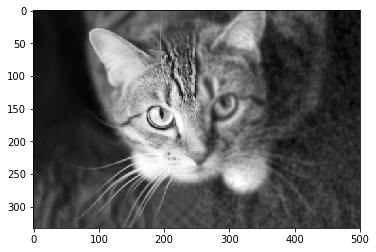

In [216]:
plt.imshow(reconstructed_img,
           vmin=0,
           vmax=1,
           cmap=plt.cm.gray,
           interpolation='nearest'
          )
plt.show()

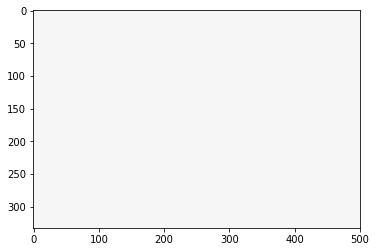

In [217]:
difference = img - distored_img
plt.imshow(difference,
           vmin=-0.5,
           vmax=0.5,
           cmap=plt.cm.PuOr,
           interpolation='nearest'
          )
plt.show()